<a href="https://colab.research.google.com/github/hiwoooo/dacon/blob/master/%EC%84%9C%EC%9A%B8%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC/progressing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
import os, shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/dacon/서울 랜드마크/'

/content/drive/MyDrive/dacon/서울 랜드마크


In [ ]:
data_path='/content/drive/MyDrive/dacon/서울 랜드마크/dataset.zip'
#! unzip '{data_path}'

Archive:  /content/drive/MyDrive/dacon/서울 랜드마크/dataset.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test/001.PNG            
  inflating: test/002.PNG            
  inflating: test/003.PNG            
  inflating: test/004.PNG            
  inflating: test/005.PNG            
  inflating: test/006.PNG            
  inflating: test/007.PNG            
  inflating: test/008.PNG            
  inflating: test/009.PNG            
  inflating: test/010.PNG            
  inflating: test/011.PNG            
  inflating: test/012.PNG            
  inflating: test/013.PNG            
  inflating: test/014.PNG            
  inflating: test/015.PNG            
  inflating: test/016.PNG            
  inflating: test/017.PNG            
  inflating: test/018.PNG            
  inflating: test/019.PNG            
  inflating: test/020.PNG            
  inflating: test/021.PNG            
  inflating: test/022.PNG            
  inflating: test/023

In [ ]:
train_path='/content/drive/MyDrive/dacon/서울 랜드마크/train'
test_path='/content/drive/MyDrive/dacon/서울 랜드마크/test'

In [ ]:
train_label=pd.read_csv('/content/drive/MyDrive/dacon/서울 랜드마크/train.csv')
train_label

,file_name,label
0,001.PNG,9
1,002.PNG,4
2,003.PNG,1
3,004.PNG,1
4,005.PNG,6
...,...,...
718,719.PNG,9
719,720.PNG,6
720,721.PNG,2
721,722.PNG,8


In [ ]:
train_label.label.value_counts()

9    76
6    75
5    75
2    75
8    74
7    72
1    71
3    71
4    67
0    67
Name: label, dtype: int64

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

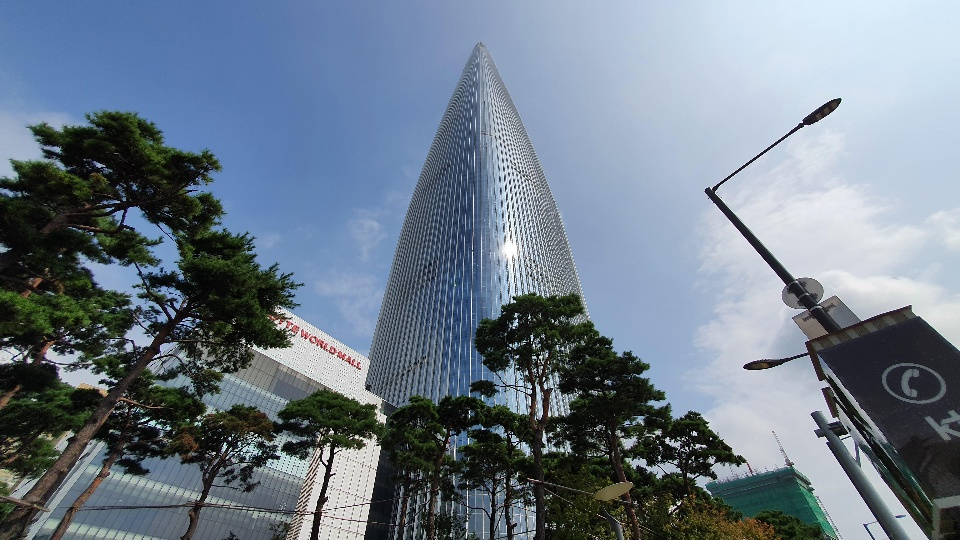

In [ ]:
sample_img=cv2.imread(os.path.join(train_path,'720.PNG'))
cv2_imshow(sample_img)

## 이미지 데이터 label 저장

In [ ]:
from glob import glob

In [ ]:
def get_train_data(data_dir):
  img_path_list=[]
  label_list=[]

  #get image path
  img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
  img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))

  #get label
  label_list.extend(train_label['label'])

  return img_path_list, label_list

def get_test_data(data_dir):
  img_path_list=[]

  #get image path
  img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
  img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))

  return img_path_list

In [ ]:
all_img_path, all_label=get_train_data(train_path)
test_img_path=get_test_data(test_path)

In [ ]:
all_label[:10]

[9, 4, 1, 1, 6, 1, 5, 8, 7, 7]

In [ ]:
all_img_path[:5]

['/content/drive/MyDrive/dacon/서울 랜드마크/train/001.PNG',
 '/content/drive/MyDrive/dacon/서울 랜드마크/train/002.PNG',
 '/content/drive/MyDrive/dacon/서울 랜드마크/train/003.PNG',
 '/content/drive/MyDrive/dacon/서울 랜드마크/train/004.PNG',
 '/content/drive/MyDrive/dacon/서울 랜드마크/train/005.PNG']

In [ ]:
len(test_img_path)

199

In [ ]:
sample_img=cv2.resize(sample_img,(128,128))
sample_pix=list(sample_img.ravel())
sample_pix=' '.join(str(s) for s in sample_pix)
sample_pix

'174 122 86 171 119 84 171 119 83 171 119 83 172 120 84 170 118 82 171 119 83 171 119 83 171 119 83 171 119 83 172 120 84 171 119 83 169 117 81 169 117 81 170 118 82 171 119 83 167 115 79 169 117 81 169 115 80 170 116 81 170 116 81 169 117 81 169 116 83 170 117 84 170 117 84 169 116 83 169 116 83 168 115 82 168 115 82 170 117 84 171 117 86 172 118 87 173 119 88 172 120 88 169 120 88 170 121 89 170 121 89 173 123 91 172 124 96 173 125 97 173 125 97 173 125 97 175 128 100 175 128 100 174 130 101 175 130 103 177 132 106 176 132 108 176 132 107 176 135 110 178 134 110 179 138 113 179 139 114 183 142 119 182 141 118 182 144 120 185 145 126 185 145 126 183 148 128 185 150 130 187 154 133 186 156 135 187 156 135 191 159 139 192 160 141 192 162 145 194 164 147 194 166 149 198 173 153 199 173 156 200 176 158 202 178 160 205 181 163 205 182 166 206 183 167 209 186 170 210 187 171 212 189 174 216 193 178 214 193 177 216 193 178 218 195 179 220 197 181 223 199 184 225 202 186 226 203 187 226 205 1

In [ ]:
label1_img=train_label[train_label['label']==1]
#ist(label1_img.file_name)

In [ ]:
label1_img['pixels']=np.NaN
label1_img

,file_name,label,pixels
2,003.PNG,1,NaN
3,004.PNG,1,NaN
5,006.PNG,1,NaN
15,016.PNG,1,NaN
34,035.PNG,1,NaN
...,...,...,...
651,652.PNG,1,NaN
667,668.PNG,1,NaN
671,672.PNG,1,NaN
693,694.PNG,1,NaN


In [ ]:
for name in list(label1_img.file_name):
  label1_img_path=os.path.join(train_path,name)
  label_img_data=cv2.resize(cv2.imread(label1_img_path),(128,128))
  label1_img_pix=list(label_img_data.ravel())
  label1_img_pix=' '.join(str(s) for s in label1_img_pix)
  #data_to_insert={ 'pixels':label1_img_pix}
  label1_img['pixels'][label1_img['file_name']==name]=label1_img_pix


label1_img

,file_name,label,pixels
2,003.PNG,1,5 12 25 5 12 29 1 7 17 9 14 25 5 11 16 17 23 4...
3,004.PNG,1,204 178 159 131 124 112 132 136 131 33 38 46 7...
5,006.PNG,1,3 14 12 5 15 16 21 40 45 15 26 28 9 16 15 5 13...
15,016.PNG,1,1 12 7 22 36 38 28 41 45 16 29 24 10 21 24 16 ...
34,035.PNG,1,30 41 33 8 16 11 20 29 25 17 28 19 20 36 35 11...
...,...,...,...
651,652.PNG,1,36 38 23 12 20 9 22 37 31 26 41 37 29 31 26 20...
667,668.PNG,1,153 149 148 112 104 92 11 22 25 177 159 135 22...
671,672.PNG,1,35 41 38 63 66 66 61 49 36 43 33 22 36 20 16 1...
693,694.PNG,1,7 28 56 41 64 77 15 35 48 10 36 52 17 33 56 41...
